In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_images)

10000

PREPROCESSING OF DATA


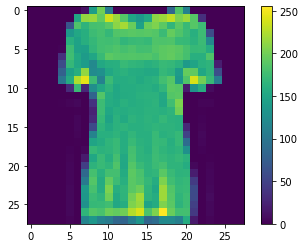

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

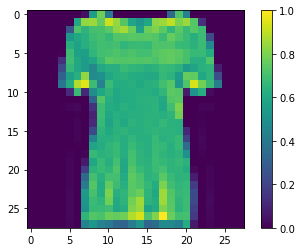

In [13]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

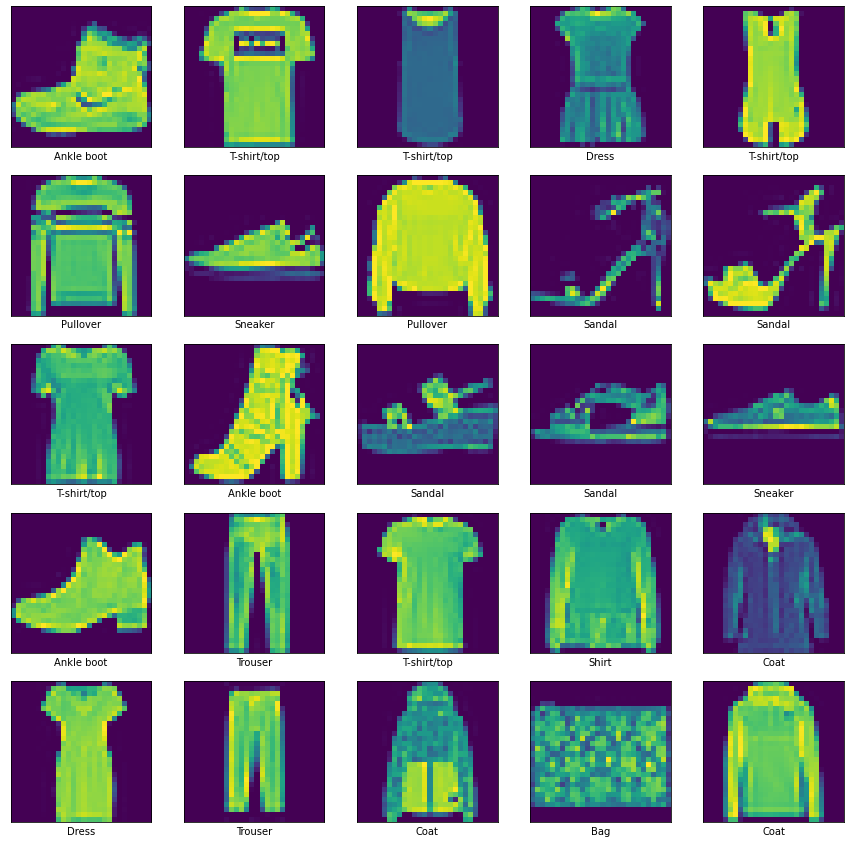

In [19]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# BUILD THE MODEL
Consists of two processes 
1.Set up the Layers 
2.Compile the model

## SET UP THE LAYER


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
##FOR EXTRA INFORMATION FOLLOW THE TUTORIALS AT TENSORFLOW


# COMPILE THE MODEL

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# TRAIN THE MODEL

## 1.FEED THE MODEL

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.4933 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3753 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.3355 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.3120 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2938 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.2802 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.2663 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 2s 929us/step - loss: 0.2582 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.2474 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 951us/st

## EVALUATE ACCURACY

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3404 - accuracy: 0.8829

Test accuracy: 0.8828999996185303


## MAKE PREDICTION

In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [25]:
predictions = probability_model.predict(test_images)

In [27]:
predictions[0]

array([1.0859618e-06, 2.3238668e-07, 1.4724273e-08, 1.6068577e-11,
       1.0333524e-06, 9.1129355e-04, 3.9827353e-07, 6.0731813e-02,
       2.6883080e-07, 9.3835390e-01], dtype=float32)

This is giving the array of "confidence"  of the model towards each of the type

In [28]:
np.argmax(predictions[0])

9

In [29]:
predictions[100]

array([9.4697037e-04, 2.8950069e-06, 6.9885973e-06, 9.9807006e-01,
       2.2179374e-06, 4.4838014e-08, 9.6881489e-04, 8.7707511e-13,
       2.0475959e-06, 1.4842746e-08], dtype=float32)

In [30]:
np.argmax(predictions[100])

3

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify Predictions

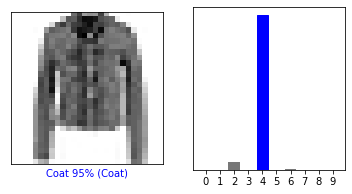

In [32]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

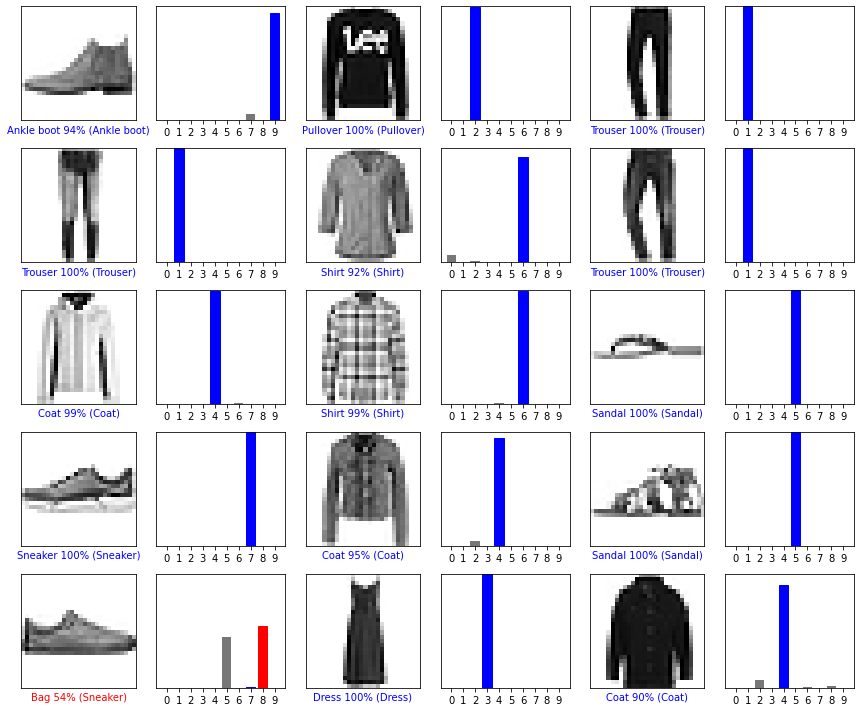

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the Trained Model 
 

In [35]:
img=test_images[0]
img.shape

(28, 28)

In [36]:
img=np.expand_dims(img,0)

In [37]:
img.shape

(1, 28, 28)

In [38]:
predict_the_single=probability_model.predict(img)

In [39]:
predict_the_single

array([[1.0859618e-06, 2.3238668e-07, 1.4724273e-08, 1.6068577e-11,
        1.0333524e-06, 9.1129309e-04, 3.9827353e-07, 6.0731828e-02,
        2.6883131e-07, 9.3835390e-01]], dtype=float32)

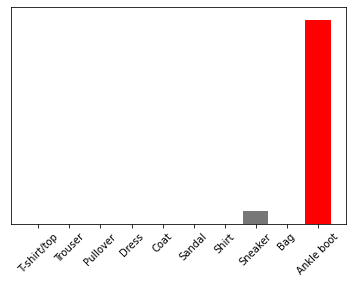

In [42]:
plot_value_array(1, predict_the_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()